# 4.1 이중 연결 리스트

## 4.1.1 이중 연결 리스트의 개념

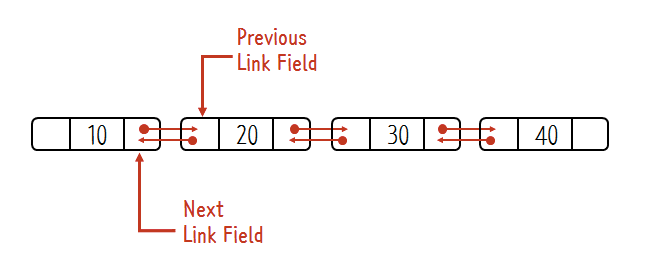

이중 연결리스트와 원형 연결리스트의 경우에 노드를 선언하는 프로그램의 코드가 어떻게 바뀌는가? 

링크가 하나 더 추가된었다는 점을 제외하고는 그다지 바뀐 부분이 없음

In [1]:
class Node:
    def __init__(self, data, next=None, prev=None):
        self.data = data
        self.next = next
        self.prev = prev
        
def init_list():
    global node_A
    node_A = Node("A")
    node_B = Node("B")    
    node_D = Node("D")    
    node_E = Node("E") 
    node_A.next = node_B
    node_B.next = node_D
    node_B.prev = node_A
    node_D.next = node_E
    node_D.prev = node_B
    node_E.prev = node_D
    
    
def print_list():
    global node_A
    node = node_A
    while node:
        print(node.data)
        node = node.next
        
if __name__ == "__main__":
    print("연결리스트 초기화 후")
    init_list()
    print_list()

연결리스트 초기화 후
A
B
D
E


## 4.1.2 이중 연결 리스트의 삽입 알고리즘

### 삽입 순서는 단일 연결 리스트의 삽입과 동일

In [2]:
class Node:
    def __init__(self, data, next=None, prev=None):
        self.data = data
        self.next = next
        self.prev = prev
        
def init_list():
    global node_A
    node_A = Node("A")
    node_B = Node("B")    
    node_D = Node("D")    
    node_E = Node("E") 
    node_A.next = node_B
    node_B.next = node_D
    node_B.prev = node_A
    node_D.next = node_E
    node_D.prev = node_B
    node_E.prev = node_D
    

    
    
def insert_node(data):
    global node_A
    new_node = Node(data)
    node_P = node_A
    node_T = node_A
    
    # 노드 순회
    while node_T.data <= data: # 삽입될 데이터보다 작거나 같을 경우
        # 앞쪽 포인터를 한칸 이동
        node_P = node_T
        # 뒤쪽 포인터를 한칸이동
        node_T = node_T.next
    # 반복문 밖으로 나온다면 ? : 삽입될 데이터가 더 크다는 것 
    #  p = B - " " - T = D
    # C 삽입 
    new_node.next = node_T
    node_P.next = new_node
    new_node.prev = node_P
    node_T.prev = new_node
    
    
    
def print_list():
    global node_A
    node = node_A
    while node:
        print(node.data)
        node = node.next
        
if __name__ == "__main__":
    print("연결리스트 초기화 후")
    init_list()
    print_list()
    
    print("노드 C의 추가 후")
    insert_node('C')
    print_list()

연결리스트 초기화 후
A
B
D
E
노드 C의 추가 후
A
B
C
D
E


## 4.1.3 이중 연결 리스트의 삭제 알고리즘

기본적인 알고리즘은 단일 연결 리스트의 경우와 다르지 않으며 단순히 prev링크에 대해서만 몇가지 고려해주면 됨

In [42]:
class Node:
    def __init__(self, data, next=None, prev=None):
        self.data = data
        self.next = next
        self.prev = prev
        
def init_list():
    global node_A
    node_A = Node("A")
    node_B = Node("B")    
    node_D = Node("D")    
    node_E = Node("E") 
    node_A.next = node_B
    node_B.next = node_D
    node_B.prev = node_A
    node_D.next = node_E
    node_D.prev = node_B
    node_E.prev = node_D
    

    
    
def insert_node(data):
    global node_A
    new_node = Node(data)
    node_P = node_A
    node_T = node_A
    
    while node_T.data <= data: 
        node_P = node_T
        node_T = node_T.next

    new_node.next = node_T
    node_P.next = new_node
    new_node.prev = node_P
    node_T.prev = new_node
    
    
def delete_node(del_data):
    global node_A
    # A
    pre_node = node_A 
    # B
    next_node = pre_node.next
    # C
    next_next_node = next_node.next
    
    
    # 노드 첫번째가 지울 노드라면? 
    if pre_node.data == del_data:
        node_A = next_node
        del pre_node
        return 
    
    # 다음 노드가 있다면 반복 한다.
    while next_node:
        if next_node.data == del_data:
            pre_node.next = next_next_node
            if next_next_node :
                next_next_node.prev = pre_node
            del next_node
            break
        else:
            # 다음 노드가 삭제할 데이터가 아니라면?
            pre_node = next_node
            next_node = next_node.next
            next_next_node = next_node.next
    
    
def print_list():
    global node_A
    node = node_A
    while node:
        print(node.data)
        node = node.next
        
if __name__ == "__main__":
    print("연결리스트 초기화 후")
    init_list()
    print_list()
    
    print("노드 C의 추가 후")
    insert_node('C')
    print_list()
    
    print("노드 E의 삭제 후")
    delete_node('E')
    print_list()

연결리스트 초기화 후
A
B
D
E
노드 C의 추가 후
A
B
C
D
E
노드 E의 삭제 후
A
B
C
D


---

# 4.2 정리

연결 리스트는 간단하게 링크가 하나만 존재하는 단일 연결 리스트와 링그가 2개 존재하는 이중 연결리스트가 존재

이중 연결 리스트의 장점은 한 방향으로만 탐색이 가능한 단일 연결 리스트에 비해, 언제 어디에서도 양쪽 방향으로 탐색이 가능

전체 탐색 시간을 줄일 수 있다는 장점 

새로운 노드의 삽입과 삭제를 할 때 코드가 복잡해진다는 단점